## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')


## Reading Data

In [2]:
df = pd.read_excel("ANZ_transaction.xlsx")

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


Based on the background info, This synthesized dataset contains 3 months' worth of transactions for 100 customers which includes purchases, recurring transactions and salary transactions.

In [4]:
#no. of rows and columns
df.shape

(12043, 23)

In [5]:
df.sort_values(by='date')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
100,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-08-01T17:00:00.000+0000,1395.49,9767953f8ae94826aa145d6cac0be371,Australia,CUS-164374203,NaN,credit
99,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,22,NaN,NaN,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,NaN,debit
98,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11948,authorized,1.0,NaN,ACC-964839203,AUD,146.92 -36.07,POS,010eb8c1-e8e2-46d6-8315-a670d7489eb3,NaN,Michael,...,21,Malvern,VIC,2018-10-31T10:55:11.000+0000,45.95,e1eec8b692b34e03a595d18ef2480235,Australia,CUS-2059096722,145.03 -37.86,debit
11949,authorized,1.0,NaN,ACC-964839203,AUD,146.92 -36.07,POS,5c78a6f7-6d63-4b56-bd4a-8da9f39f9f2b,NaN,Michael,...,21,Port Douglas,QLD,2018-10-31T11:02:06.000+0000,32.12,84cdbe46f8d9462f869b44379dd256b2,Australia,CUS-2059096722,145.46 -16.51,debit
11951,authorized,1.0,NaN,ACC-2249586092,AUD,115.98 -32.07,POS,e2ca89a0-af6b-4977-aec5-4775622aba6f,NaN,Edward,...,19,Mirrabooka,WA,2018-10-31T11:12:41.000+0000,5.42,e132fa94bd36443cbe846d4cba2ce1d2,Australia,CUS-443776336,115.86 -31.87,debit
11944,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,SALES-POS,c517e9ce-fba4-4269-ac69-739d51ef969b,NaN,Michael,...,38,Armidale,NSW,2018-10-31T10:23:11.000+0000,36.23,01b2fa3b2c304a2db74012bf84374177,Australia,CUS-2142601169,151.67 -30.52,debit


In [6]:
#checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## 1. Data Checks

In [7]:
# checking to see if we have 100 unique customers
df.date.describe(datetime_is_numeric=True)

count                            12043
mean     2018-09-15 21:27:39.951839232
min                2018-08-01 00:00:00
25%                2018-08-24 00:00:00
50%                2018-09-16 00:00:00
75%                2018-10-09 00:00:00
max                2018-10-31 00:00:00
Name: date, dtype: object

In [8]:
# checking the data contains 3 months of data
dmin = date(2018, 8, 1)
dmax = date(2018, 10, 31)
diff = dmax - dmin
print("No. of days: ",diff.days)

No. of days:  91


We seem to be missing one more date as the total no of days should be 92.

In [9]:
# checking for missing date
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(df.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

We have 3 months worth of data, starting from `1/8/2018 to 31/10/2018` which are only 91 unique days and the one missing date is `2018-08-16`.



In [10]:
# checking to see if we have 100 unique customers
print("Number of unique customer ID's: ", df.customer_id.nunique())

Number of unique customer ID's:  100


In [11]:
print("Number of rows: ", len(df))
print("Number of unique transaction ID's: ", df.transaction_id.nunique())

Number of rows:  12043
Number of unique transaction ID's:  12043


This proves that there are no duplicate transactions and each each row corresponds to a single`transaction_id`.

In [12]:
# checking to see if we have 100 unique customers
df['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

### 1.1 Null values

In [13]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(df), 3) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Both `bpay_biller_code` and `merchant_code` columns contain a significant number of missing values. We will deal with those missing values later.

### 1.2 Descriptive statistics of numerical variables

In [14]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Checking for anomalies and incosistencies in numerical values, i.e negative values in age, amount and balance. We can see see a huge distribution between the maximum and minimum amount in the balance and amount columns. 

Let's get an overview of all columns that have missing values

In [15]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

## 2. Data Preparation
### 2.1 Categorical variables
Let's analyse all the categorical variables to check for any errors from Data, missing values, impossible data, outliers etc.

In [16]:
# listing all object datatypes
list(df.select_dtypes(['object']).columns)

['status',
 'bpay_biller_code',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement']

Taking into consideration that they are just identifiers and the amount of the null values present, the following columns would be irrelevant and would not provide useful info.
* `bpay_biller_code`
* `account`
* `merchant_id`
* `first_name`
* `customer_id`
* `merchant_id`

### 2.1.1 Status

In [17]:
df['status'].value_counts

<bound method IndexOpsMixin.value_counts of 0        authorized
1        authorized
2        authorized
3        authorized
4        authorized
            ...    
12038    authorized
12039    authorized
12040    authorized
12041    authorized
12042    authorized
Name: status, Length: 12043, dtype: object>

Status of of the individual transactions: authorised means transaction has already been approved, posted means still in the process.

### 2.1.2 Description of transactions

In [18]:
df['txn_description'].value_counts

<bound method IndexOpsMixin.value_counts of 0              POS
1        SALES-POS
2              POS
3        SALES-POS
4        SALES-POS
           ...    
12038          POS
12039    SALES-POS
12040          POS
12041    SALES-POS
12042    SALES-POS
Name: txn_description, Length: 12043, dtype: object>

### 2.1.3 Currency

In [19]:
df['currency'].value_counts

<bound method IndexOpsMixin.value_counts of 0        AUD
1        AUD
2        AUD
3        AUD
4        AUD
        ... 
12038    AUD
12039    AUD
12040    AUD
12041    AUD
12042    AUD
Name: currency, Length: 12043, dtype: object>

In [20]:
df['card_present_flag'].value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

Text(0.5, 1.0, 'Number of transactions by category')

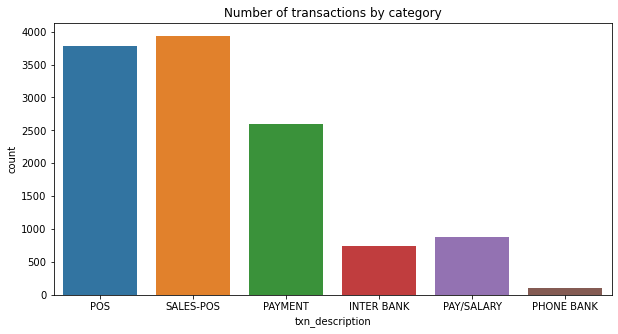

In [21]:
plt.figure(figsize = (10, 5))
sns.countplot(df['txn_description'])
plt.title("Number of transactions by category")

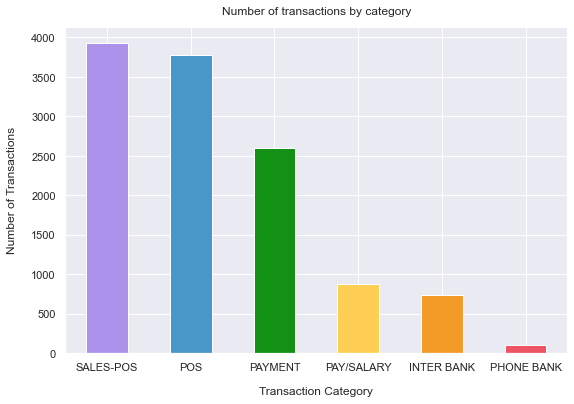

In [22]:

sns.set(font_scale=1)
df['txn_description'].value_counts().plot(kind='bar', figsize=(9, 6),color=['#AC92EB', '#4996C8', '#129114', '#FFCE54', '#F39A27','#ED5564'], rot=0)
plt.xlabel("Transaction Category", labelpad=14)
plt.ylabel("Number of Transactions", labelpad=14)
plt.title("Number of transactions by category", y=1.02);



These are the descriptions for each transaction. Transactions mostly consist of sales payment.

Also, this might explain the missing values in the merchant columns as not all transactions are purchases of goods and services from merchants. We can validate this later.

In [23]:
df[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

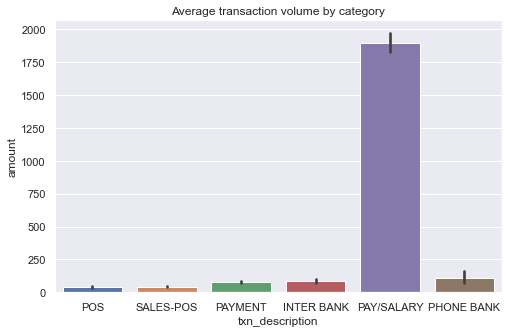

In [24]:
plt.figure(figsize = (8, 5))
sns.barplot(x = df['txn_description'], y = df['amount'])
plt.title("Average transaction volume by category")

Pay/salary has the largest average transaction volume. Seems logical.

### 2.1.3 Gender

In [25]:
df['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

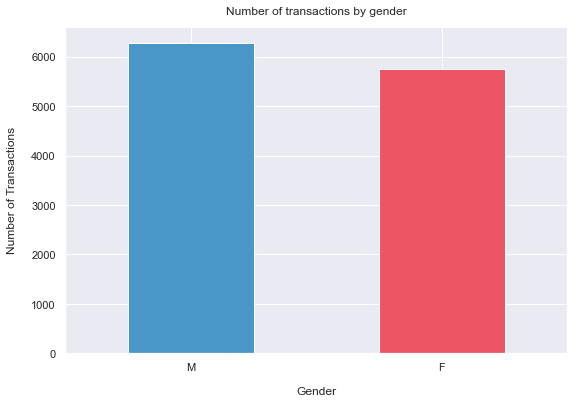

In [26]:
df['gender'].value_counts().plot(kind='bar', figsize=(9, 6),color=['#4996C8', '#ED5564'], rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of Transactions", labelpad=14)
plt.title("Number of transactions by gender", y=1.02);

It appears that there are more male customer transactions than there are female.

In [27]:
df[['gender', 'amount']].groupby('gender', as_index = False).mean().sort_values(by = 'amount', ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Males have a higher average transaction compared to females.

### 2.1.4 Merchant suburb

In [28]:
df['merchant_suburb'].value_counts(dropna = False)

NaN              4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
                 ... 
Sorell              1
Dry Creek           1
Perth Airport       1
Silkstone           1
Bowen               1
Name: merchant_suburb, Length: 1610, dtype: int64

There are `4326` null values, Melbourne and Sydney appears have to higher number of trasactions than other suburbs.

### 2.1.5 Merchant state¶

In [29]:
df['merchant_state'].value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

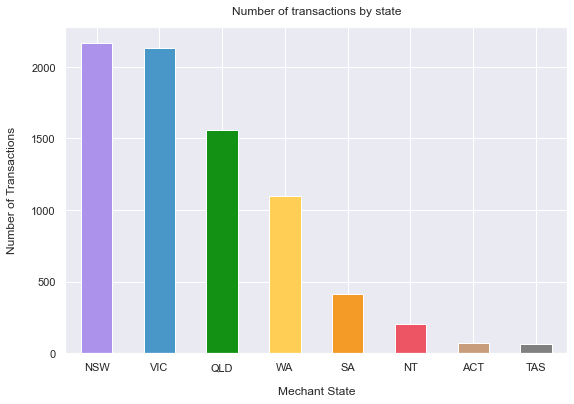

In [30]:
df['merchant_state'].value_counts().plot(kind='bar', figsize=(9, 6),color=['#AC92EB', '#4996C8', '#129114', '#FFCE54', '#F39A27','#ED5564','#C89D7C','#808080'], rot=0)
plt.xlabel("Mechant State", labelpad=14)
plt.ylabel("Number of Transactions", labelpad=14)
plt.title("Number of transactions by state", y=1.02);

`NSW` and `VIC` have a higher number of transactions.

In [31]:
df[["merchant_state", "amount"]].groupby("merchant_state", 
as_index = False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

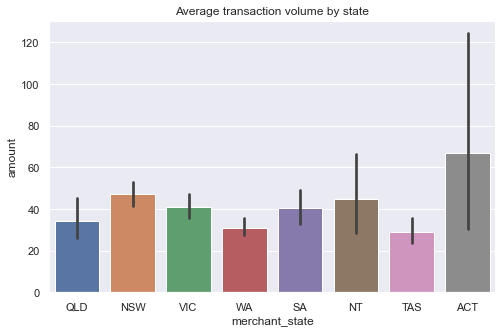

In [32]:
plt.figure(figsize = (8, 5))
sns.barplot(x = df['merchant_state'], y = df['amount'])
plt.title("Average transaction volume by state")

ACT has the highest average transaction volume and the variance is quite large.

### 2.1.6 Merchant longitude and latitude¶

In [33]:
# coordinates of the merchants' location.
df[['merchant_long_lat']].head()

,merchant_long_lat
0,153.38 -27.99
1,151.21 -33.87
2,151.21 -33.87
3,153.05 -26.68
4,153.44 -28.06


### 2.1.7 Country

In [34]:
# since there's only one country the transactions are recorded,
#doesn't provide any helpul info, potentially will be dropped.
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

### 2.1.8 Movement (debit/credit)¶

In [35]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

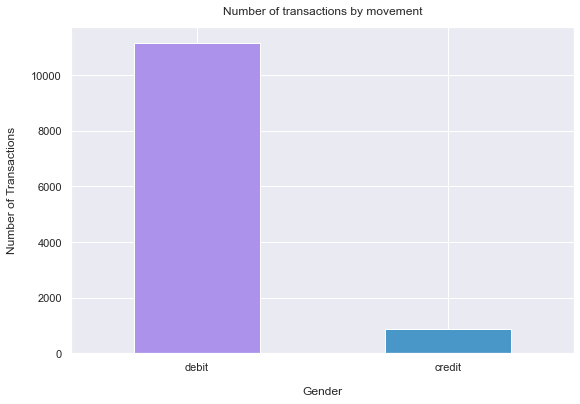

In [36]:
df['movement'].value_counts().plot(kind='bar', figsize=(9, 6),color=['#AC92EB','#4996C8'], rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of Transactions", labelpad=14)
plt.title("Number of transactions by movement", y=1.02);



Text(0.5, 1.0, 'Average transaction density by movement')

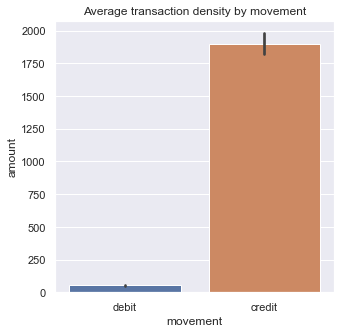

In [37]:
plt.figure(figsize = (5, 5))
sns.barplot(x = df['movement'], y = df['amount'])
plt.title("Average transaction density by movement")

The average transaction amount for credit transactions are much higher.

## 2.2 Analysing the numerical variables

### 2.2.1 Age of customers¶

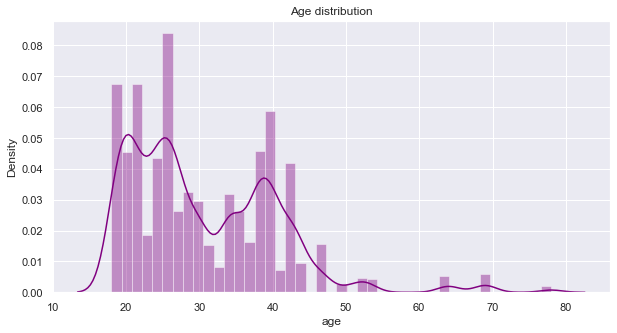

In [38]:
sns.set(rc={"figure.figsize": (10, 5)}); 
np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(df['age'],color="purple")
plt.title("Age distribution")
plt.show()

### 2.1.9 Transaction amount

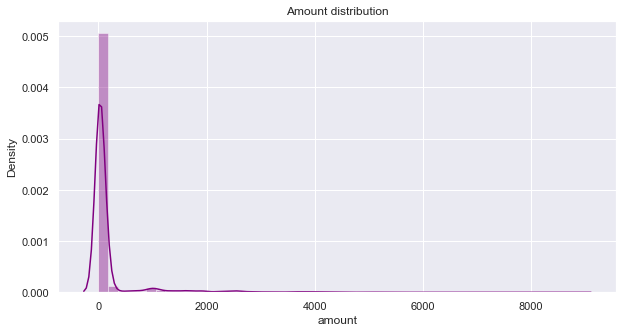

In [39]:
sns.set(rc={"figure.figsize": (10, 5)}); 
np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(df['amount'],color="purple")
plt.title("Amount distribution")
plt.show()

### 2.1.10 Balance

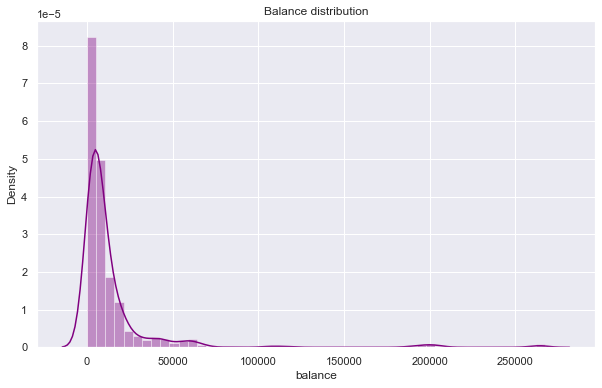

In [40]:
sns.set(rc={"figure.figsize": (10, 6)}); 
np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(df['balance'],color="purple")
plt.title("Balance distribution")
plt.show()

### 3. Data Wrangling

Our goal is to simplify and speed up data transformations while also  enhancing model accuracy. This involves dealing with inconsistencies, missing values, dropping unwanted columns and creating new features to improve our model in Task 2.

### 3.1 Deal with missing values

In [41]:
pd.DataFrame({"Number of missing values":missing, 
"Percentage": missing_percentage}).sort_values(by = "Percentage", 
                                               ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [42]:
nonSales = df.loc[(df['txn_description'] != "SALES-POS") | 
                  (df['txn_description']  != "POS"), :]
nonSales.isnull().sum().sort_values(ascending = False)
missing_nonSales = nonSales.isnull().sum()
missing_nonSales = missing_nonSales[missing_nonSales > 0]
missing_nonSales.sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_id           4326
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64

Missing data in the following columns all originate from non-purchases transactions:
* merchant_suburb
* merchant_long_lat
* merchant_id
* card_present_flag
* merchant_state

In [43]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    df[col].fillna("n/a", inplace = True)

In [44]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

In [45]:
df = df.drop(["merchant_code", "bpay_biller_code"], axis = 1)

In [46]:
df.isnull().sum().max()

0

### 3.2 Drop unwanted columns
Drop currency and country columns as they do not provide any aditional information.

In [47]:
print("Before: ", df.shape)
df = df.drop(["currency", "country"], axis = 1)
print("After: ", df.shape)

Before:  (12043, 21)
After:  (12043, 19)


In [48]:
### 3.3 Time Series Analysis

In [49]:
daily_amount = pd.DataFrame(df.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

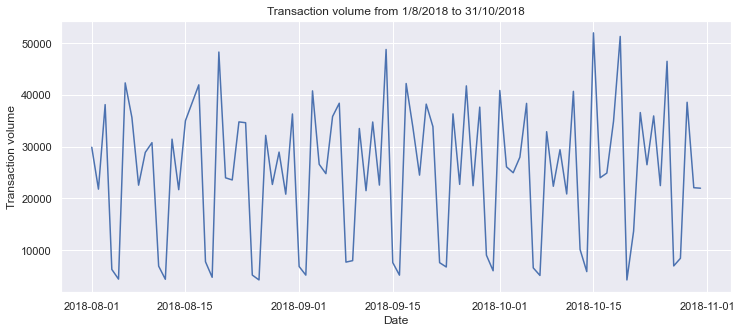

In [50]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")


There appears to be a cyclical pattern in transaction volume over the 3 month period. My hypothesis for this occurence is:

Salaries are paid out only on certain days of the week
People tend to spend more during the weekends (shopping, going out with friends etc)
Therefore, to motivate this analysis, we will create 3 new features from both the date and extraction columns:

* month
* dayofweek
* hour

In [51]:
df['month'] = pd.DatetimeIndex(df.date).month
df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
df[['date', 'month', 'dayofweek']].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In addition to month and day of week, we can also get the hour in which those transactions took place from the extraction column.

First, I will update the extraction column such that it only contains the time. Then, I will create a new hour column which contains only the hour component of each transaction.

In [52]:
df['extraction'].head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [53]:
df["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in df.extraction]
df.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [54]:

df['hour'] = [time.split(":")[0] for time in df['extraction']]
df[['extraction', 'hour']].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [55]:
print("Before: ", df['hour'].dtype)
df['hour'] = pd.to_numeric(df['hour'])
print("After: ", df['hour'].dtype)

Before:  object
After:  int64


In [56]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1



### 4.1 Purchases amount and overall amount¶

In [57]:
purchases_amount = df.loc[(df['txn_description'] == "POS") | (df['txn_description'] == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

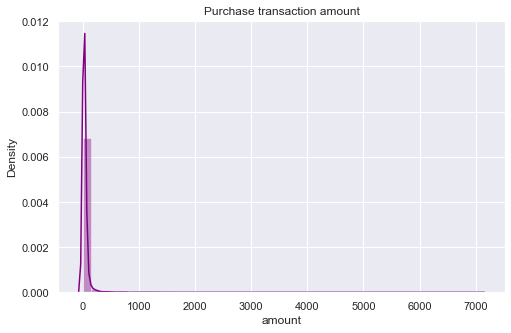

In [58]:
sns.set(rc={"figure.figsize": (8, 5)}); 
np.random.seed(0)
ax = sns.distplot(purchases_amount,color="purple")
plt.title("Purchase transaction amount")
plt.show()

In [59]:
purchases_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

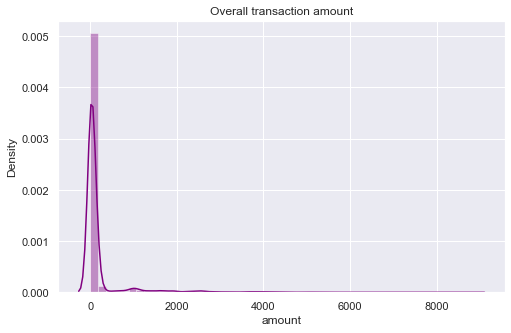

In [60]:
sns.set(rc={"figure.figsize": (8, 5)}); 
np.random.seed(0)
ax = sns.distplot(df['amount'],color="purple")
plt.title("Overall transaction amount")
plt.show()

In [61]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

### 4.2 Transaction volume per customer

In [62]:
customer_monthly_volume = pd.DataFrame(df.groupby('customer_id')['amount'].sum() / 3) 
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


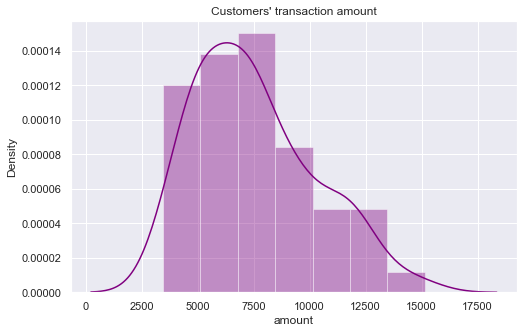

In [63]:
sns.set(rc={"figure.figsize": (8, 5)}); 
np.random.seed(0)
ax = sns.distplot(customer_monthly_volume.amount,color="purple")
plt.title("Customers' transaction amount")
plt.show()

### 4.3 Transaction volume over time

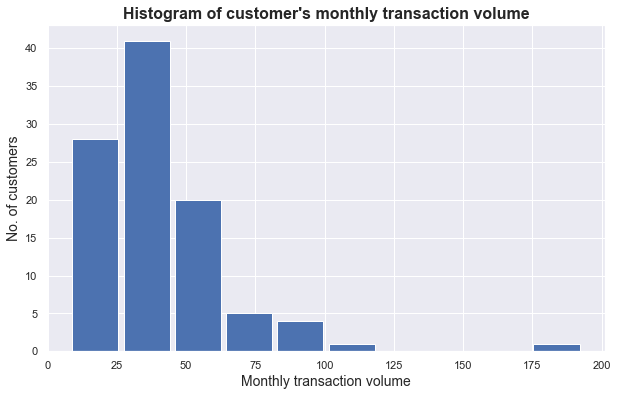

In [64]:
cust=round(df["customer_id"].value_counts()/3,0)

#plot a histogram with the monthly transaction volume
plt.figure(figsize=(10,6))
plt.hist(cust,rwidth =0.9)
plt.title("Histogram of customer's monthly transaction volume",fontsize=16, fontweight='bold')
plt.ylabel("No. of customers",fontsize=14)
plt.xlabel("Monthly transaction volume",fontsize=14)


plt.show()

In [65]:
average_daily_volume = pd.DataFrame(df.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

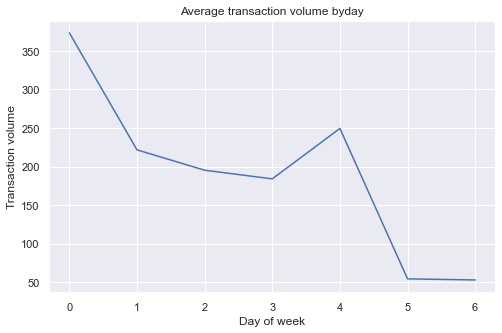

In [66]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume byday")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")


Friday and Saturday have the lowest average transaction volume. Let's see a breakdown of these transactions by types of transactions.

To simplify the categories, I will group all transactions into 3 categories:

* Salary
* Purchase
* Others

In [67]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [68]:
df.loc[df['txn_description'] == "PAY/SALARY", "category"] = "Salary"
df.loc[(df['txn_description'] == "SALES-POS") | (df['txn_description']== "POS"), "category"] = "Purchase"
df.category.fillna("Others", inplace = True)
df[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

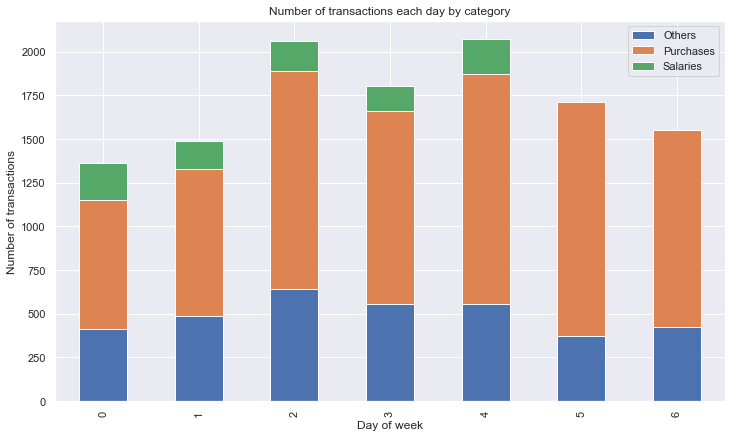

In [69]:
stacked_barplot = pd.DataFrame(df.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

No salaries were paid on Friday and Saturday, therefore lower average transaction volume on those days.

Also, it does not seem to appear that people spend more on purchases over the weekends.

In [70]:
average_hourly_volume = pd.DataFrame(df.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

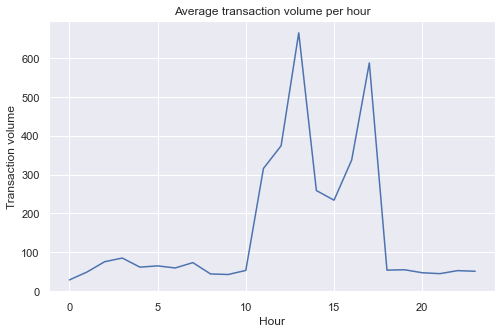

In [71]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Highest transaction volumes happen during the midday and late afternoon. Let's see a breakdown of these transactions by categories.

Text(0.5, 0, 'Hour')

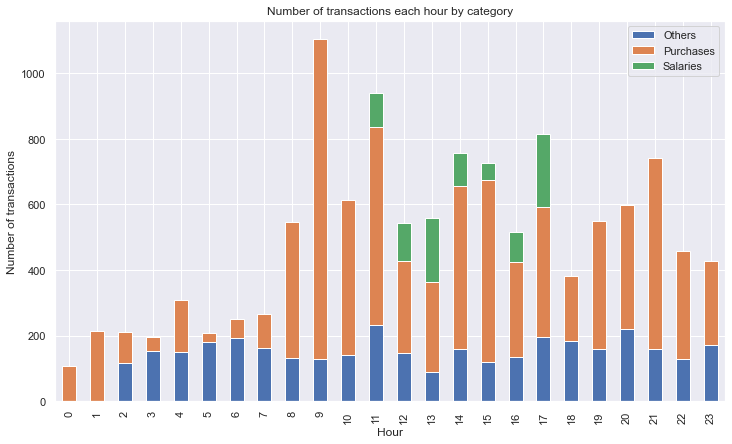

In [72]:
stacked_barplot = pd.DataFrame(df.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")


## 5. Save data¶

In [79]:
df.to_pickle(r"data.pkl")